<hr style="border-top-width:4px; border-top-color: #2188bf;">
<img align="right" src="images/Logo_Università_Padova.png" alt="Drawing" style="width: 300px"/>
<img align="right" src="images/Logo_Physics_of_Data.jpg" alt="Drawing" style="width: 135px"/>

# LoCP (mod.B) Final Project
# Study of an upper bound of $\mathcal{B}(h \longrightarrow J/\psi \gamma)$ in pp collisions at $\sqrt{s} = 13 \ \text{TeV}$

### Authors
* [Ardino Rocco](https://github.com/RoccoA97) (University of Padua)
* [Paccagnella Andrea](https://github.com/pacca4) (University of Padua)
* [Valente Alessandro](https://github.com/mastrovalentz) (University of Padua)

### Supervisors
* Prof. [Marco Zanetti](https://github.com/mzanetti79) (University of Padova, CERN)
* Dr. [Alberto Zucchetta](https://github.com/zucchett) (University of Padova, CERN)

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

# Index <a class="anchor" id="LOCP_B_FP.i"></a>

* 1. [Introduction](#LOCP_B_FP.1.)
    * 1.1. [Project context and goals](#LOCP_B_FP.1.1.)
    * 1.2. [Software and needed packages](#LOCP_B_FP.1.2.)
* 2. [The datasets](#LOCP_B_FP.2.)
    * 2.1. [Background dataset](#LOCP_B_FP.2.1.)
    * 2.2. [Signal dataset](#LOCP_B_FP.2.2.)
* 3. [Slim, Skim, Cut and Selection operations](#LOCP_B_FP.3.)
* 4. [Fit of background and signal distributions](#LOCP_B_FP.4.)
* 5. [Statistical tests](#LOCP_B_FP.5.)

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 1. - Introduction <a class="anchor" id="LOCP_B_FP.1."></a>
* [Index](#LOCP_B_FP.i)

<br>
<br>

### 1.1. - Project context and goals <a class="anchor" id="LOCP_B_FP.1.1."></a>
* [Index](#LOCP_B_FP.i)

#### **Physics context**

In 2012, a new boson with a mass of $125 \ \text{GeV}$ was observed in data from the ATLAS and CMS experiments at the CERN LHC. All measurements of the properties of this boson are consistent with those of the Higgs boson ($H$) of the standard model (SM). However, the Yukawa couplings of the Higgs boson to the first- and second-generation quarks are currently only weakly constrained. Rare exclusive decays of the Higgs boson to mesons in association with a photon can be used to explore such couplings. For example, the decay:

$$
H \longrightarrow J/\psi \gamma
$$

can probe the Higgs boson coupling to the charm quark. Through CMS detector, a study can be done by considering the subsequent decay of the $J/\psi$ to $\mu^+\mu^-$, which has a SM predicted branching ratio of:

$$
\mathcal{B}(H \rightarrow J/\psi\gamma \rightarrow \mu^+\mu^-\gamma)
=
\mathcal{B}(H \rightarrow J/\psi\gamma) \cdot \mathcal{B}(J/\psi \rightarrow \mu^+\mu^-)
=
3.0 \cdot 10^{-6} \cdot 5.9 \cdot 10^{-2}
\approx
1.8 \cdot 10^{-7}
$$

This information, combined with the Higgs cross section $\sigma_H$ and with the total integrated luminosity $\mathcal{L}$ of LCH, gives an expected number of events of about $1.22$ over 3 years of runs. So, this is quite difficult to observe, but an exclusion upper limit for the branching ratio can be studied through filtering and Monte Carlo techniques.

#### **Goals**

In this project, we consider the **NanoAOD Charmonium** datasets of CMS from 2016, 2017 and 2018 runs (for the background) and a Monte Carlo simulated dataset of $H \rightarrow J/\psi \rightarrow \mu^+\mu^-\gamma$ (for the signal). Our aims are:
* **finding an optimal cut** applied to both the datasets in order to filter the background data but at the same time keeping a good fraction of signal events;
* **modeling** the filtered background and signal distributions;
* **applying a Monte Carlo statistical analysis** to the background plus signal distribution amplified by a factor $\mu$, namely the signal strength parameter;
* **finding a significance** of signal detection depending on $\mu$, from which we extract the upper limit on the branching ratio.

<br>
<br>

### 1.2. - Software and needed packages <a class="anchor" id="LOCP_B_FP.1.2."></a>
* [Index](#LOCP_B_FP.i)

The whole analysis has been performed on the **ROOT** analysis framework, implementing several macros in **c++ language** and some **bash scripts** to automate the workflow. The source code can be found [**here**](https://github.com/pacca4/Project_LocpB_plots). For this report, the **pyROOT** extension is exploited.

Here, we import all the needed python and ROOT packages for the report.

#### **pyROOT packages**

In [10]:
import ROOT

from ROOT import TCanvas
from ROOT import TH1F

#### **Python packages**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 2. - The datasets <a class="anchor" id="LOCP_B_FP.2."></a>
* [Index](#LOCP_B_FP.i)

For our analysis, we employ two datasets, one for background data and one for signal. The latter is simulated through Monte Carlo generation software like MadGraph5, taking into account the hadronization and the detector response through other sotwares like Pythia and Delphi.

<br>
<br>

### 2.1. - Background dataset <a class="anchor" id="LOCP_B_FP.2.1."></a>
* [Index](#LOCP_B_FP.i)

The background dataset is the collection of the **NanoAOD** files belonging to the **Charmonium list**. It contains the filtered data from CMS experiment collected from the runs from 2016 to 2018. Note that the NanoAOD format comes from the last part of pre-selection events and its weigth is of the order of **~1 kB/event**. This is very small compared to the weigth of about ~1 MB/event of raw data coming from the trigger.

<br>
<br>

### 2.2. - Signal dataset <a class="anchor" id="LOCP_B_FP.2.2."></a>
* [Index](#LOCP_B_FP.i)

The signal dataset is a Monte Carlo simulation of the decay $H \longrightarrow J/\psi \gamma$, coming as well as the background files in the NanoAOD format.

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 3. - Slim, Skim, Cut and Selection operations <a class="anchor" id="LOCP_B_FP.3."></a>
* [Index](#LOCP_B_FP.i)

Since the number of background events is too huge for our purpuse, the first part of our work is reducing this dataset through several operations done in order:
* **Slimming**: we are interested only in certain physical features and triggers inside the background files, so we keep only the branches useful for the following analysis and for reconstructing some other interesting features. All the rest is not kept.
* **Skimming**: not all the events are interesting for our analysis, in particular the ones which do not satisfy a certain condition on the luminosity during their collection. In the new slimmed and skimmed files, these events will not be present.
* **Cutting**: a candidate signal is characterized by certain kinematic conditions. Therefore, some upper and/or lower bounds on some kinematic features have to be set. The events which do not meet these conditions will not be considered.
* **Selection**: as before, there are some conditions that signal events should meet. Some of them are condensed inside the High Level Triggers (HLTs), which are substantially a bool that is `true` if a characteristic condition is met, otherwise it flags `false`.

In the following subsections, we explain in a deeper way this procedure and we present its results.

<br>
<br>

### 3.1. - Post Processor  <a class="anchor" id="LOCP_B_FP.3.1."></a>
* [Index](#LOCP_B_FP.i)




In the first part the selection we do the following operation:
- event selection based on luminosity 
- event selection based on the presence of at least 2 muons and a photon
- invariant mass computation of the Dimuon and the Dimuon and Photon 
- event selection based on kinematich variables


The events are required to satisfy the following properties:
- $\mu\mu\gamma$ invariant mass $M_{\mu\mu\gamma}\in[70, 150]$ Gev
- $\mu\mu $ invariant mass $M_{\mu\mu}\in [2.8, 3.3]$
- leadin muon transverse momementa $p_{T\mu}>10$
- photon transverse momementa $p_{T\gamma}>20$

We do it because we want a lighter dataset and eliminate the event that definitely do not belong at the decay.



After this we want create a new dataset by adding some Branch, thanks this we can monitorate the difference from Monte Carlo simulation an the dataset. 
We create this branch:
- $\textbf{JPsi_mass}$: the recostruction mass of the candidate $J/\psi$. $\sqrt{2P_{T1}P_{T2}(cosh(\eta_1-\eta_2)-cos(\phi_1-\phi_2))}$ where $\eta$ is a  pseudo-rapidity.
- $\textbf{JPsi_pt}$:  the trasversal moment of $J/\psi$.
- $\textbf{JPsi_eta}$: the pseudorapidity of $J/\psi$.
- $\textbf{JPsi_phi}$: azimuthal Angle.

- $\textbf{Reco_mass}$: the recostruction mass of the candidate $H$ 
- $\textbf{Rec_pt, Reco_eta, Reco_phi}$: the same of $J/\psi$.

This is the principal new branch that we use. We add also some features to use in the second moment to do a cat and undarstand if it is correct.

- $\textbf{DeltaR}$: the $\Delta R$ between two particle. $\Delta R = \sqrt{(\Delta\phi)^2+(\Delta\eta)^2}$

- $\textbf{AngleCM}$: the cosine angle between the two particle in the centre of the mass. $cos\theta=\frac{\vec{v_1}^*\cdot\vec{v_2^*}} {|\vec{v_1^*}|\cdot|\vec{v_2^*}|} $


- $\textbf{DeltaPhiCM}$: the $\phi$ angle between two particle in the centre of mass. $\triangle \phi= \phi^*_1 - \phi^*_2$

- $\textbf{DeltaRCM}$: the $\triangle R$ between two particle in the centre of mass. $\triangle R = \sqrt{(\triangle\phi^*)^2+(\triangle\eta^*)^2}$

The angular variables are computed by boosting the particles momenta to the Center of mass frame of the reconstruced particle, in the reference frame the $\Delta R$, $\Delta \phi$ and $\Delta \eta$ variable are computed alongside with the angle between the tracks.









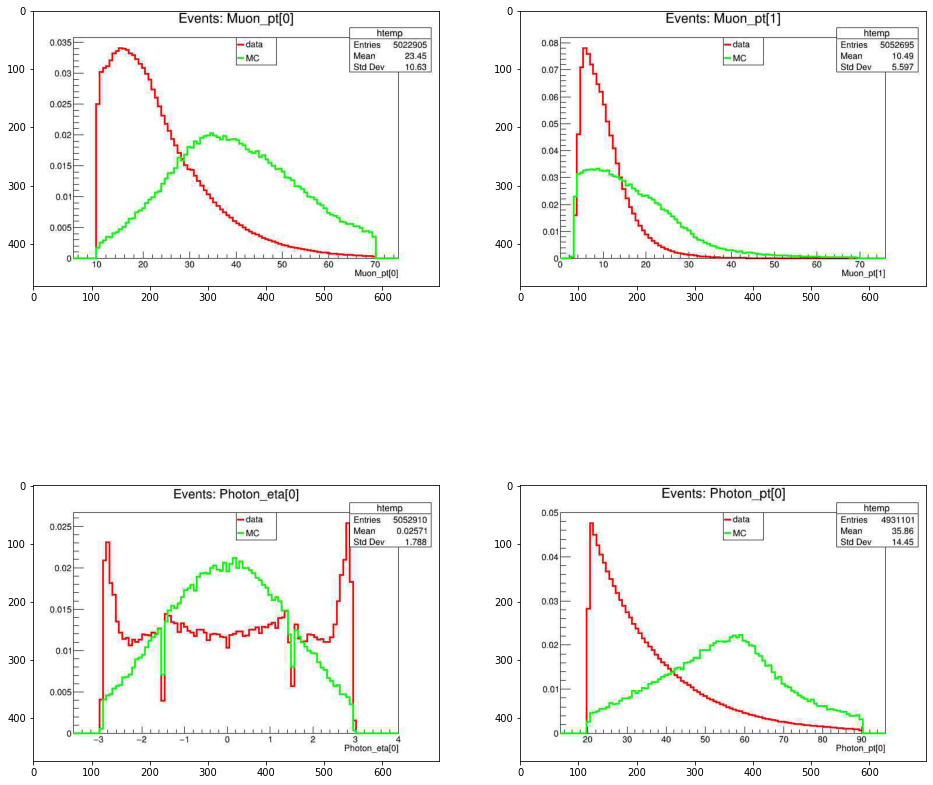

In [17]:
from IPython.display import Image 


a=mpimg.imread("images/muon_pt_0..jpg")
b=mpimg.imread("images/muon_pt_1.jpg")
c=mpimg.imread("images/photon_eta.jpg")
d=mpimg.imread("images/photon_pt_0..jpg")

fig, ax = plt.subplots(2,2, figsize=(16,16))
ax[0,0].imshow(a)
ax[0,1].imshow(b)
ax[1,0].imshow(c)
ax[1,1].imshow(d)

From this plot we decide to apply further cuts, in particular:
- leading and subleading muon posses diffrent electric charge
- leadin muon transverse momementa $p_{T\mu}>15$
- subleadin muon transverse momementa $p_{T\mu}>2$
- photon transverse momementa $p_{T\gamma}>25$
- photon eta $\eta_{\gamma}<2.9$


### 3.2. - Trigger  <a class="anchor" id="LOCP_B_FP.3.2."></a>
* [Index](#LOCP_B_FP.i)


After the selection of the events we analyzed the trigger effect on the Signal and Background dataset, in particular we observed which triggers are present in most of the Background dataset while having an high efficiency on the Signal one, from this analysis

In [2]:
! head -n 20 ../Triggers/TrigAcce.txt

HLT_L1SingleMuOpen acc % 99.7098
HLT_Mu8 acc % 96.8805
HLT_L1SingleMu18 acc % 92.8989
HLT_Mu3_PFJet40 acc % 92.6365
HLT_TkMu17 acc % 92.6293
HLT_Mu17 acc % 91.8064
HLT_TkMu20 acc % 90.5703
HLT_L2Mu10 acc % 89.5062
HLT_Mu12_Photon25_CaloIdL_L1OR acc % 88.9799
HLT_Mu12_Photon25_CaloIdL acc % 88.9799
HLT_Mu7p5_Track2_Jpsi acc % 88.8761
HLT_Mu7p5_Track3p5_Jpsi acc % 88.0069
HLT_Mu20 acc % 86.0105
HLT_Mu12_Photon25_CaloIdL_L1ISO acc % 85.7331
HLT_Mu17_Photon22_CaloIdL_L1ISO acc % 83.9251
HLT_Mu17_Photon30_CaloIdL_L1ISO acc % 83.7352
HLT_Mu8_TrkIsoVVL acc % 81.4521
HLT_TkMu24_eta2p1 acc % 81.3461
HLT_Mu17_Photon35_CaloIdL_L1ISO acc % 81.0097
HLT_Mu16_TkMu0_dEta18_Onia acc % 80.0708


From this analysis we decided to use the follwing triggers:
- HLT_IsoMu27 : this want a isolate muon with trasversal momentum greater than 27Gev.
- HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ : this want two muon isolate with trasversal momentum 17Gev and 8Gev  respectively.


The Signal and Background dataset are then filtered using those triggers obtaining the foloowing distributions.

After this we compere the distribution of $J/\psi$ mass, the photon trasversal momentum and the ratio from photon trasversal monmentum and the mass reconstructed, from each trigger rispect a Monte Carlo simulation

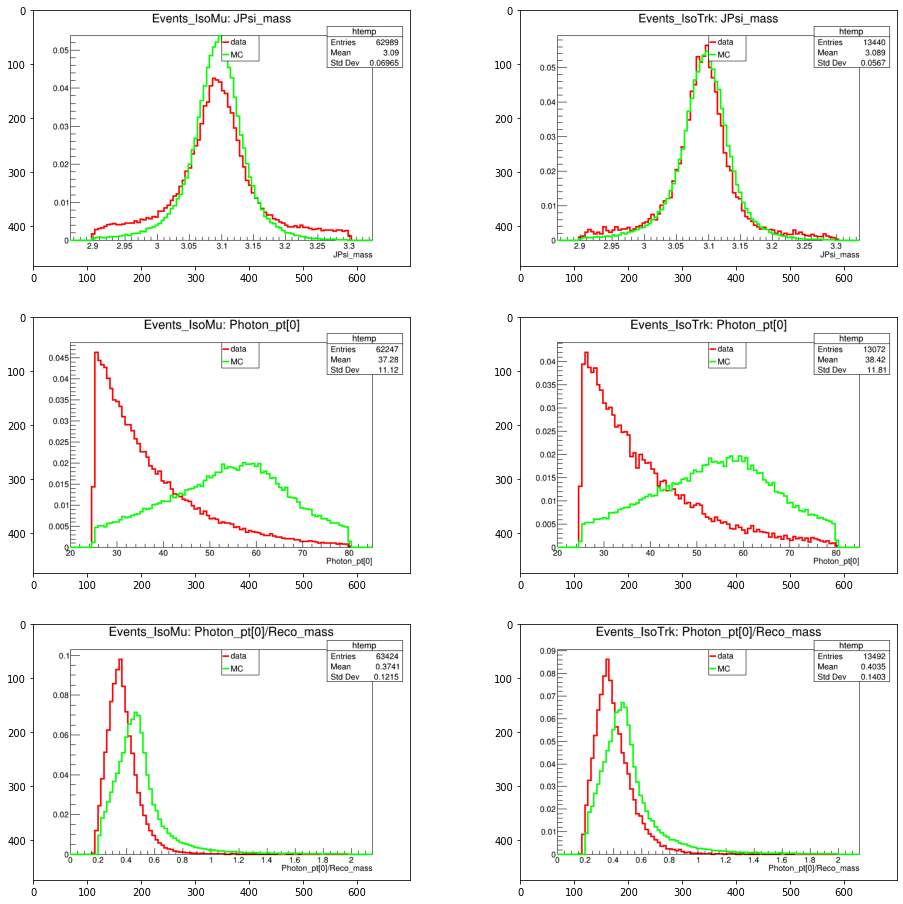

In [19]:
a=mpimg.imread("images/jpsi_isomu.png")
b=mpimg.imread("images/jpsi_isotrk.png")
c=mpimg.imread("images/ph_pt_isomu.png")
d=mpimg.imread("images/ph_pt_isotrk.png")
e=mpimg.imread("images/ph_pt_reco_isomu.png")
f=mpimg.imread("images/ph_pt_reco_isotrk.png")

fig, ax = plt.subplots(3,2, figsize=(16,16))
ax[0,0].imshow(a)
ax[0,1].imshow(b)
ax[1,0].imshow(c)
ax[1,1].imshow(d)
ax[2,0].imshow(e)
ax[2,1].imshow(f)

### 3.3. - Cutted  <a class="anchor" id="LOCP_B_FP.3.3."></a>
* [Index](#LOCP_B_FP.i)

From this plot we apply this cat:
- $p_{T\gamma}/m_{J/\psi}>0.38$
- $M_{\mu\mu}\in [3, 3.2]$

And after this we start to do 

<hr style="border-top-width:4px; border-top-color: #2188bf;">

<br>
<br>
<br>
<br>
<br>

<hr style="border-top-width:4px; border-top-color: #2188bf;">

## 4. - Fit of background and signal distributions <a class="anchor" id="LOCP_B_FP.4."></a>
* [Index](#LOCP_B_FP.i)

## 5. - Statistical tests <a class="anchor" id="LOCP_B_FP.5."></a>
* [Index](#LOCP_B_FP.i)

# JupyROOT test (to remove)

### Non interactive (standard) cell

In [19]:
c1 = TCanvas("c1")
h1 = TH1F("h1","Histo from a Gaussian",100,-3,3);
h1.FillRandom("gaus",1000000);
h1.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


### Interactive cell
Just add ```%jsroot on```

**Make JSROOT work**

In [7]:
%%javascript
if (!0) {
    var s = document.createElement('script');
    s.src='https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js';
    document.body.appendChild(s);
}

<IPython.core.display.Javascript object>

In [8]:
JSROOT = True

In [20]:
if JSROOT:
    %jsroot on
c1 = ROOT.TCanvas("c1")
h1 = ROOT.TH1F("h1","Histo from a Gaussian",100,-5,5);
h1.FillRandom("gaus",1000000);
h1.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


In [14]:
if JSROOT:
    %jsroot on
c2 = ROOT.TCanvas("c1")
h1 = ROOT.TH1F("h1","Histo from a Gaussian",100,-5,5);
h1.FillRandom("gaus",10000000);
h1.Draw()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
